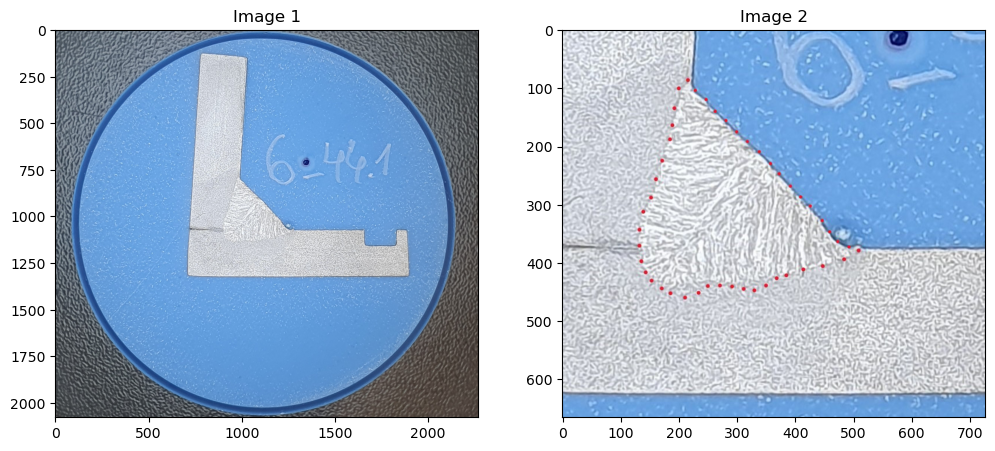

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the images
image_path_1 = '1.jpg'
image_path_2 = '2.jpg'

image_1 = Image.open(image_path_1)
image_2 = Image.open(image_path_2)

image_1 = np.array(image_1)
image_2 = np.array(image_2)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.title('Image 2')
plt.show()


In [ ]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[None, None, 3])

    # Downsampling through the model
    down_stack = [
        tf.keras.layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(128, 3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(256, 3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv2D(512, 3, strides=2, padding='same', activation='relu')
    ]

    up_stack = [
        tf.keras.layers.Conv2DTranspose(256, 3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv2DTranspose(128, 3, strides=2, padding='same', activation='relu'),
        tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu'),
    ]

    x = inputs

    # Downsampling
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    # This is the last layer of the model
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same', activation='softmax')  # 1 or 2 depending on the output_channels

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

OUTPUT_CHANNELS = 3
model = unet_model(OUTPUT_CHANNELS)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
C:\Users\arab\AppData\Roaming\Python\Python39\Scripts